In [17]:
#kil_3ada
import tensorflow as tf
import numpy as np 
import pandas as pd

# I.import the data

aouel 7aja na3mlou ha bel tbi3a heya ne5tarou el data set el besh ne5edmou biha 

1) el data maoujouda 3andek fel pc

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
#library tetelhe bel input/output 
#fi 7aletna a7na ta9ra el file ou tbadel fih
#besh ta3ref akther a3liha : https://www.askpython.com/python-modules/python-io-module
train_df= pd.read_csv(io.BytesIO(uploaded['train.csv'])).set_index("id")
test_df= pd.read_csv(io.BytesIO(uploaded['test.csv'])).set_index("id")


2) 3andek link fih el file

In [3]:
train_url = "https://drive.google.com/file/d/1HWNg308mAiq1vQam_UqLytmhV_ajghO2/view?usp=sharing"
train_url='https://drive.google.com/uc?id=' + train_url.split('/')[-2]
test_url ="https://drive.google.com/file/d/1XSF3OQ8UuKRAsMSHxaPnnh0PCPWe7tCF/view?usp=sharing"
test_url='https://drive.google.com/uc?id=' + test_url.split('/')[-2]
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(train_url)

ou fama barsh touro9 o5ra kif anek testa3mel el kaggle api ouala tconnecti el colab bel drive  ama manesh besh nshoufouhom el mara hethi 


# II.Data visualization

aouel 7keya 5an shoufou el data set mte3na shneya fiha 

In [4]:
train_df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


le shape mte3ha 9adesh 3ana men sxp ou 9adesh 3ana men feature

In [5]:
train_df.shape

(300000, 26)

n5thou "sample" mel dataset mte3na

In [6]:
train_df.iloc[0]

id                1
cat0              B
cat1              B
cat2              B
cat3              C
cat4              B
cat5              B
cat6              A
cat7              E
cat8              C
cat9              N
cont0       0.20147
cont1    -0.0148218
cont2      0.669699
cont3      0.136278
cont4      0.610706
cont5      0.400361
cont6      0.160266
cont7      0.310921
cont8       0.38947
cont9      0.267559
cont10     0.237281
cont11     0.377873
cont12     0.322401
cont13      0.86985
target      8.11363
Name: 0, dtype: object

netfa9dou ken ne9sa 7aja

In [7]:
train_df.isnull().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

mafam shay ne9es no need to impute the data or drop some of it

ama fama moshekla! 3ana categorical data :/ 
lezem n7aoulouha yama bel ordinal_econder ouala bel one_hot_encoder 

# Data preprocessing 

nshoufou anehom el cols ely fihom categorical data 

In [8]:
object_cols = [col for col in train_df if train_df[col].dtypes == 'object' ]

In [9]:
object_cols

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

nshoufou shnouma el classes elyu 3ana men kol categorical variable (feature)

In [10]:
for col in object_cols: 
  print(train_df[col].unique())

['B' 'A']
['B' 'A']
['B' 'A']
['C' 'A' 'D' 'B']
['B' 'C' 'A' 'D']
['B' 'D' 'C' 'A']
['A' 'B' 'C' 'H' 'D' 'I' 'G' 'E']
['E' 'F' 'D' 'B' 'G' 'C' 'A' 'I']
['C' 'A' 'G' 'E' 'F' 'D' 'B']
['N' 'O' 'F' 'K' 'M' 'I' 'G' 'H' 'L' 'B' 'A' 'J' 'D' 'C' 'E']


lehne ena 5taret na3mel ordinal encoding 

In [11]:
from sklearn.preprocessing import OrdinalEncoder
#import sklearn a7sen mely ta3mel haka ._.
ordinal_encoder = OrdinalEncoder()
encoded_train_df=train_df.copy()
encoded_train_df[object_cols]=ordinal_encoder.fit_transform(train_df[object_cols])

kont najem na3mel one hot encoding 5ater el nbre mta3 el classes moush kbir barsha 

In [12]:
# from sklearn.preprocessing import OneHotEncoder
# OH_encoder =OneHotEncoder(handle_unknown='ignore',sparse=False)
# encoded_train_df=train_df.copy()
# for col in object_cols:
#   encoded_train_df[col]=OH_encoder.fit_transform(np.array(train_df[col]).reshape(-1, 1))

ouala kont najem na3mel el zouz! cols na3melhom bel ordinal encoder oou cols na3malhom bel one hot encoder ou nshouf anehou ely medli les resultas ely 5ir

In [13]:
encoded_train_df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


n9asmou el data mte3na el featuers (X)ou taget (y)
(supervised learning)

In [14]:
X=encoded_train_df.iloc[:,1:-1]

In [15]:
X

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.0,1.0,0.0,0.0,1.0,3.0,0.0,4.0,0.0,8.0,0.697124,0.483452,0.297770,0.195821,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404
299996,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,5.0,0.446200,0.715135,0.610931,0.601730,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611
299997,1.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,6.0,5.0,0.544279,0.060937,0.590955,0.905308,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732
299998,0.0,1.0,0.0,2.0,1.0,1.0,0.0,4.0,4.0,8.0,0.300062,0.613118,0.285213,0.406851,0.805963,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030


In [22]:
y=encoded_train_df.iloc[:,-1:]

In [23]:
y

,target
0,8.113634
1,8.481233
2,8.364351
3,8.049253
4,7.972260
...,...
299995,7.945605
299996,7.326118
299997,8.706755
299998,7.229569


n9asmou el data mte3na train ou validation 

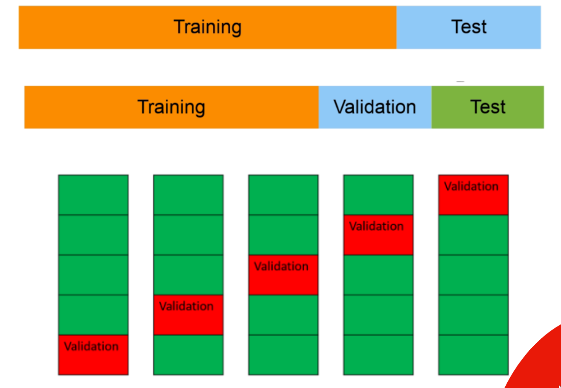

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y)

# Model

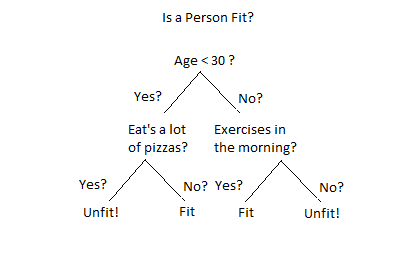

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
model=RandomForestRegressor(random_state=1)
model.fit(x_train,y_train)
pred_valid=model.predict(x_valid)
print(mean_squared_error(y_valid,pred_valid,squared=False))

In [ ]:
predictions=model.predict(x_test)
output=pd.DataFrame({'Id':x_test.index,'target':predictions})
output.to_csv('submissions.csv',index=False)

a o5ra b algo esmou xgb

In [ ]:
# XGB_model = XGBRegressor(n_estimators=6500, learning_rate=0.0325, max_depth=3, tree_method='gpu_hist', predictor='gpu_predictor')
# XGB_model.fit(X_train, y_train)
# preds_valid = XGB_model.predict(X_valid)
# loss=mean_squared_error(y_valid, preds_valid, squared=False)
# print(loss)